In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Download Telco Customer Churn dataset
!kaggle datasets download blastchar/telco-customer-churn

# Download Credit Card Fraud dataset
!kaggle datasets download mlg-ulb/creditcardfraud


Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

# Unzip Telco Customer Churn dataset
with zipfile.ZipFile('telco-customer-churn.zip', 'r') as zip_ref:
    zip_ref.extractall('telco_churn')

# Unzip Credit Card Fraud dataset
with zipfile.ZipFile('creditcardfraud.zip', 'r') as zip_ref:
    zip_ref.extractall('creditcard_fraud')


In [ ]:
import requests

# URLs for the dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
names_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names"

# Download the data file
with open("adult.data", "wb") as f:
    response = requests.get(data_url)
    f.write(response.content)

# Download the test file
with open("adult.test", "wb") as f:
    response = requests.get(test_url)
    f.write(response.content)

# Download the names file (description)
with open("adult.names", "wb") as f:
    response = requests.get(names_url)
    f.write(response.content)


In [ ]:
import pandas as pd

# Load Telco Churn dataset
telco_df = pd.read_csv('telco_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Load Credit Card Fraud dataset
credit_card_df = pd.read_csv('creditcard_fraud/creditcard.csv')
# Separate the positive and negative samples
positive_samples = credit_card_df[credit_card_df['Class'] == 1]  # Fraudulent transactions
negative_samples = credit_card_df[credit_card_df['Class'] == 0]  # Non-fraudulent transactions
# Randomly select 20,000 negative samples
negative_samples_subset = negative_samples.sample(n=20000, random_state=42)
# Combine the positive samples and the selected negative samples
subset_df = pd.concat([positive_samples, negative_samples_subset])
# Shuffle the resulting subset to mix the positive and negative samples
subset_df = subset_df.sample(frac=1, random_state=42).reset_index(drop=True)
credit_card_df = subset_df.copy()

# Load Adult dataset
adult_df = pd.read_csv('adult.data', header=None, delimiter=',\s+', engine='python', na_values=['?'])
adult_test_df = pd.read_csv('adult.test', header=None, delimiter=',\s+', engine='python',skiprows=1, na_values=['?'])
adult_test_df[14] = adult_test_df[14].str.replace('.', '', regex=False)

# Define the column headers
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                  'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                  'hours-per-week', 'native-country', 'income']

# Assign column headers to the training DataFrame
adult_df.columns = column_headers

# Assign column headers to the test DataFrame
adult_test_df.columns = column_headers
adult_df = pd.concat([adult_df, adult_test_df], axis=0)
# adult_df, adult_test_df = train_test_split(adult_df, test_size=0.2, random_state=42)

print(np.unique(adult_df['income']))
adult_df.head()





['<=50K' '>50K']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
telco_df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
adult_df.nunique()

,0
age,74
workclass,8
fnlwgt,28523
education,16
education-num,16
marital-status,7
occupation,14
relationship,6
race,5
sex,2


In [ ]:
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,61420.0,1.193234,0.192237,0.410407,0.712207,-0.587457,-1.340555,0.254351,-0.230846,0.006657,...,-0.471567,-1.525994,0.289019,0.641974,0.011953,-0.148823,-0.053654,0.024317,30.09,0
1,72735.0,1.126200,0.091070,0.504603,1.489081,-0.438088,-0.397006,-0.009764,0.041542,0.479512,...,-0.091906,-0.114996,-0.011580,0.383078,0.569650,-0.329121,0.029729,0.017656,15.96,0
2,70763.0,-1.028764,0.876655,0.774502,-0.792080,0.061250,-0.507228,1.302146,-0.481326,-0.172492,...,-0.443123,-1.121331,0.133384,0.007541,-0.312769,0.523610,-0.608835,-0.136493,79.90,0
3,34564.0,1.035258,0.281099,1.131438,2.478573,-0.405893,0.213864,-0.290705,0.155243,-0.443221,...,-0.025717,-0.182892,0.095871,0.047774,0.112565,-0.121977,0.026953,0.039666,44.07,0
4,68338.0,-0.483155,-0.016123,1.979678,-1.079068,-0.107175,0.609598,-0.539064,0.321502,-1.669046,...,0.184585,0.390673,-0.258332,-0.794636,0.071685,-0.090176,0.100444,0.065282,5.57,0


In [ ]:
adult_df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
def findNanAndReplace(df):
    #Those NaN will be imputed
    missing_values_count = df.isna().sum()
    columns_with_missing_values = missing_values_count[missing_values_count > 0].index.tolist()
    print(f'columns_with_missing_values: {columns_with_missing_values}')
    imputer_numerical = SimpleImputer(strategy='mean')
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    # df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])
    for col in columns_with_missing_values:
      if df[col].dtype == 'object':
        df[col] = imputer_categorical.fit_transform(df[[col]].astype(str)).ravel()
      else:
        df[col] = imputer_numerical.fit_transform(df[[col]])

    return df


In [ ]:
def findDupAndDrop(df):
  print(f'duplicated: {df.duplicated().sum()}')
  if df.duplicated().any():
    df.drop_duplicates(inplace=True)
  print(f'duplicated after dropping: {df.duplicated().sum()}')
  return df

In [ ]:
def featuresThatNeedsEncodingAndLabeling(features_df):
  features_that_needs_label_encoding = []
  features_that_needs_hot_encoding = []

  for col in features_df.columns:
    if features_df[col].dtype == 'object':
      if len(features_df[col].unique()) <= 2:
        features_that_needs_label_encoding.append(col)
      else:
        features_that_needs_hot_encoding.append(col)

  return features_that_needs_label_encoding, features_that_needs_hot_encoding


In [ ]:
def labelEncoding(features_df, features_that_needs_label_encoding):
  labelEncoder = LabelEncoder()
  for col in features_that_needs_label_encoding:
    features_df[col] = labelEncoder.fit_transform(features_df[col])

  print(features_df[features_that_needs_label_encoding].dtypes)
  return features_df

In [ ]:
def hotEncoding(features_df, features_that_needs_hot_encoding):
  oneHotEncoder = OneHotEncoder(sparse_output=False)
  features_df_hot_encoded = pd.DataFrame(features_df, columns=features_that_needs_hot_encoding)
  features_df_hot_encoded = pd.get_dummies(features_df_hot_encoded).astype('int64')

  features_df = features_df.drop(features_that_needs_hot_encoding, axis=1)
  features_df = pd.concat([features_df, features_df_hot_encoded], axis=1)
  return features_df

In [ ]:
def scaling(features_df, scaler_type, numerical_cols):
  if scaler_type == "StandardScaler":
      scaler = StandardScaler()
  elif scaler_type == "MinMaxScaler":
    scaler = MinMaxScaler()

  features_df[numerical_cols] = scaler.fit_transform(features_df[numerical_cols])
  return features_df

In [ ]:
def preprocess(df, dataset_name, scaler):
  if dataset_name == 'telco':
    df.drop('customerID', axis=1,inplace = True)

    #totalCharges is object type. SO it is converted to float and some non-numeric values like string are converted to NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    print(df[df.duplicated(keep=False)].head(20))
    #look for duplications
    # df = findDupAndDrop(df)


    #find and replace Nan
    df = findNanAndReplace(df)



    #separting the numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    categorical_cols.remove('Churn')

    features = numerical_cols + categorical_cols
    target = 'Churn'

    features_df = df[features]
    target_df = df[target]


    #now we need to encode categorical_cols
    #label encoding at first

    features_that_needs_label_encoding, features_that_needs_hot_encoding = featuresThatNeedsEncodingAndLabeling(features_df)

    print(features_that_needs_label_encoding)
    print(features_that_needs_hot_encoding)

    # for col in features_df.columns:
    #   print(df[col].unique())

    #label encoding
    features_df = labelEncoding(features_df, features_that_needs_label_encoding)
    labelEncoder = LabelEncoder()
    target_df = labelEncoder.fit_transform(target_df)


    #hot encoding
    features_df = hotEncoding(features_df, features_that_needs_hot_encoding)

    #scaling
    featues_df = scaling(features_df, scaler, numerical_cols)
    print(f'telco shape {features_df.shape}')

    #correlation
    correlation_matrix = features_df.corrwith(pd.Series(target_df))
    # print(correlation_matrix)

    top_25_correlated_features = correlation_matrix.abs().sort_values(ascending=False)[:20]
    print(top_25_correlated_features)
    features_df = features_df[top_25_correlated_features.index]
    print(features_df.dtypes)

    return features_df, target_df

  elif dataset_name == 'creditcard':

    #looking for NaN
    df = findNanAndReplace(df)

    #looking for duplications
    # df = findDupAndDrop(df)

    features_df = df.drop('Class', axis=1)
    target_df = df['Class']
    # numerical_cols = features_df.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()
    # print(numerical_cols)

    #scaling
    features_df = scaling(features_df, scaler, features_df.columns)

    #correlation
    correlation_matrix = features_df.corrwith(pd.Series(target_df))

    top_25_correlated_features = correlation_matrix.abs().sort_values(ascending=False)[:20]
    print(top_25_correlated_features)
    features_df = features_df[top_25_correlated_features.index]

    return features_df, target_df

  elif dataset_name == 'adult':
    df = findNanAndReplace(df)
    #df = findDupAndDrop(df)

    features_df = df.drop('income', axis=1)
    target_df = df['income']
    features_that_needs_label_encoding, features_that_needs_hot_encoding = featuresThatNeedsEncodingAndLabeling(features_df)
    numerical_cols = features_df.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()

    print("label and hot encoding needed:")
    print(features_that_needs_label_encoding)
    print(features_that_needs_hot_encoding)

    #label encoding
    features_df = labelEncoding(features_df, features_that_needs_label_encoding)
    labelEncoder = LabelEncoder()
    target_df = labelEncoder.fit_transform(target_df)

    #hot encoding
    features_df = hotEncoding(features_df, features_that_needs_hot_encoding)

    #scaling
    features_df = scaling(features_df, scaler, numerical_cols)
    print(features_df.shape)

    #correlation
    correlation_matrix = features_df.corrwith(pd.Series(target_df))
    #print(correlation_matrix)


    top_25_correlated_features = correlation_matrix.abs().sort_values(ascending=False)[:20]
    # print(top_25_correlated_features)
    features_df = features_df[top_25_correlated_features.index]


    # correlation_matrix = features_df.corrwith(pd.Series(target_df))

    # # Select the top correlated features
    # top_correlated_features = correlation_matrix.abs().sort_values(ascending=False)[:100]

    # # Select the features based on correlation with the target
    # features_df = features_df[top_correlated_features.index]

    # # Handle multicollinearity: Remove highly correlated features
    # corr_matrix = features_df.corr().abs()
    # upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # # Drop features with correlation higher than the threshold
    # to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
    # features_df = features_df.drop(to_drop, axis=1)


    return features_df, target_df








In [ ]:
df_telco_copy = telco_df.copy()
x_telco, y_telco = preprocess(df_telco_copy, 'telco', 'StandardScaler')
x_telco.head(20)
df_credit_card_copy = credit_card_df.copy()
x_credit_card, y_credit_card = preprocess(df_credit_card_copy, 'creditcard', 'StandardScaler')
x_credit_card.head(20)
df_adult_copy = adult_df.copy()
x_adult, y_adult = preprocess(df_adult_copy, 'adult', 'StandardScaler')
x_adult.head(20)
# df_adult_test_copy = adult_test_df.copy()
# x_adult_test, y_adult_test = preprocess(df_adult_test_copy, 'adult', 'StandardScaler')
# x_adult_test.head(20)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
22      Male              0      No         No       1          Yes   
100     Male              0      No         No       1          Yes   
542   Female              0      No         No       1          Yes   
646     Male              0      No         No       1          Yes   
662     Male              0      No         No       1          Yes   
690     Male              0      No         No       1          Yes   
964     Male              0      No         No       1          Yes   
976     Male              0      No         No       1          Yes   
1243    Male              0      No         No       1          Yes   
1338    Male              0      No         No       1          Yes   
1491  Female              0      No         No       1          Yes   
1731  Female              1      No         No       1          Yes   
1739    Male              0      No         No       1          Yes   
1932  

<ipython-input-392-da7379bf7e0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df[col] = labelEncoder.fit_transform(features_df[col])
<ipython-input-392-da7379bf7e0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df[col] = labelEncoder.fit_transform(features_df[col])
<ipython-input-392-da7379bf7e0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

label and hot encoding needed:
['sex']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
sex    int64
dtype: object
(48842, 107)


,marital-status_Married-civ-spouse,relationship_Husband,education-num,marital-status_Never-married,age,relationship_Own-child,hours-per-week,capital-gain,occupation_Exec-managerial,sex,occupation_Prof-specialty,relationship_Not-in-family,education_Bachelors,education_Masters,education_Prof-school,occupation_Other-service,capital-loss,relationship_Unmarried,education_Doctorate,education_HS-grad
0,0,0,1.136512,1,0.025996,0,-0.034087,0.146932,0,1,0,1,1,0,0,0,-0.217127,0,0,0
1,1,1,1.136512,0,0.828308,0,-2.213032,-0.144804,1,1,0,0,1,0,0,0,-0.217127,0,0,0
2,0,0,-0.419335,0,-0.046942,0,-0.034087,-0.144804,0,1,0,1,0,0,0,0,-0.217127,0,0,1
3,1,1,-1.197259,0,1.047121,0,-0.034087,-0.144804,0,1,0,0,0,0,0,0,-0.217127,0,0,0
4,1,0,1.136512,0,-0.776316,0,-0.034087,-0.144804,0,0,1,0,1,0,0,0,-0.217127,0,0,0
5,1,0,1.525474,0,-0.119879,0,-0.034087,-0.144804,1,0,0,0,0,1,0,0,-0.217127,0,0,0
6,0,0,-1.975183,0,0.755371,0,-1.970927,-0.144804,0,0,0,1,0,0,0,1,-0.217127,0,0,0
7,1,1,-0.419335,0,0.974183,0,0.369421,-0.144804,1,1,0,0,0,0,0,0,-0.217127,0,0,1
8,0,0,1.525474,1,-0.557504,0,0.772930,1.745173,0,0,1,1,0,1,0,0,-0.217127,0,0,0
9,1,1,1.136512,0,0.244808,0,-0.034087,0.550049,1,1,0,0,1,0,0,0,-0.217127,0,0,0


In [ ]:
#split telco and credit card
x_telco_train, x_telco_test, y_telco_train, y_telco_test = train_test_split(x_telco, y_telco, test_size=0.2, random_state=42)
x_credit_card_train, x_credit_card_test, y_credit_card_train, y_credit_card_test = train_test_split(x_credit_card, y_credit_card, test_size=0.2, random_state=42)
x_adult_train, x_adult_test, y_adult_train, y_adult_test = train_test_split(x_adult,y_adult,test_size=0.2, random_state=42)

print(np.unique(y_adult))

[0 1]


In [ ]:
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
)

def calculate_metrics(y_true, y_pred, y_prob):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Sensitivity (Recall)
    sensitivity = recall_score(y_true, y_pred)

    # Specificity
    specificity = tn / (tn + fp)

    # Precision
    precision = precision_score(y_true, y_pred)

    # F1-score
    f1 = f1_score(y_true, y_pred)

    # AUROC
    auroc = roc_auc_score(y_true, y_prob)

    # AUPR
    aupr = average_precision_score(y_true, y_prob)

    metrics = {
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Precision": precision,
        "F1-score": f1,
        "AUROC": auroc,
        "AUPR": aupr,
    }

    return metrics


In [ ]:
# class LogisticRegression:
#     def __init__(self, learning_rate=0.01, n_iters=1000):
#         self.learning_rate = learning_rate
#         self.n_iters = n_iters
#         self.weights = None
#         self.bias = None

#     def sigmoid(self, z):
#       # Ensure z is a numpy array
#       z = np.array(z, dtype=np.float64)  # Convert z to a numpy array of float type
#       return 1 / (1 + np.exp(-z))

#     # Fit the model
#     def fit(self, X, y):
#         # Number of samples and features
#         n_samples, n_features = X.shape
#         X = np.array(X, dtype=float)
#         y = np.array(y, dtype=float)

#         # Initialize weights and bias
#         self.weights = np.zeros(n_features, dtype=float)
#         self.bias = 0.0


#         # Gradient descent
#         for _ in range(self.n_iters):
#             # Linear model: y = wX + b
#             linear_model = np.dot(X, self.weights) + self.bias
#             y_predicted = self.sigmoid(linear_model)


#             # Compute gradients
#             dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
#             db = (1 / n_samples) * np.sum(y_predicted - y)


#             # Update parameters
#             self.weights -= self.learning_rate * dw
#             self.bias -= self.learning_rate * db



#     # Prediction function
#     def predict(self, X):
#         linear_model = np.dot(X, self.weights) + self.bias
#         y_predicted = self.sigmoid(linear_model)
#         y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
#         return np.array(y_predicted_cls)

#     # Accuracy calculation
#     def accuracy(self, y_true, y_pred):
#         return np.sum(y_true == y_pred) / len(y_true)

import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.5, n_iters=1000, l2_penalty=0.005):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.l2_penalty = l2_penalty  # L2 regularization strength
        self.weights = None
        self.bias = None
        self.losses = []

    # Sigmoid method
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        # Binary cross-entropy with L2 regularization
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
        # Calculate L2 regularization loss
        l2_loss = (self.l2_penalty / 2) * np.sum(self.weights ** 2)
        return -np.mean(y1 + y2) + l2_loss

    def feed_forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        A = self.sigmoid(z)
        return A

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(self.compute_loss(y, A))
            dz = A - y  # Derivative of sigmoid and BCE X.T*(A-y)
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, dz) + self.l2_penalty * self.weights  # L2 penalty
            db = (1 / n_samples) * np.sum(dz)
            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)


    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return y_predicted

    def accuracy(self, y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)

    def loss(self, X, y):
        n_samples = X.shape[0]
        y_predicted = self.sigmoid(np.dot(X, self.weights) + self.bias)
        loss = -(1 / n_samples) * (np.dot(y, np.log(y_predicted + 1e-15)) + np.dot((1 - y), np.log(1 - y_predicted + 1e-15)))
        loss += (self.regularization_strength / (2 * n_samples)) * np.sum(self.weights ** 2)
        return loss


In [ ]:
# #finding best hyperparameters
# learning_rates = [0.01, 0.05, 0.1, 0.5, 1]
# # learning_rates = [10, 50, 100, 1000, 1000]
# regularization_strengths = [0.01, 0.1, 1, 10, 100]
# itr_rates = [100, 500, 1000, 2000, 5000]

# for lr in learning_rates:
#   for rs in regularization_strengths:
#     itr = 1000
#     model = LogisticRegression(learning_rate=lr, n_iters=itr, regularization_strength=rs)
#     model.fit(x_adult_train, y_adult_train)
#     predictions = model.predict(x_adult_test)
#     accuracy = model.accuracy(y_adult_test, predictions)
#     print(f'For Adult Dataset: Learning Rate: {lr}, Regularization Strength: {rs}, Iterations: {itr}:')
#     print(f'Accuracy: {accuracy}')
#     print(calculate_metrics(y_adult_test, predictions, model.predict_proba(x_adult_test)))



In [ ]:
# from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(x_telco_train, y_telco_train)
predictions = model.predict(x_telco_test)
accuracy = model.accuracy(y_telco_test, predictions)
print(f'For Telco Dataset:{accuracy}')
print(calculate_metrics(y_telco_test, predictions, model.predict_proba(x_telco_test)))

model = LogisticRegression()
model.fit(x_credit_card_train, y_credit_card_train)
predictions = model.predict(x_credit_card_test)
accuracy = model.accuracy(y_credit_card_test, predictions)
print(f'For Credit Card Dataset:{accuracy}')
print(calculate_metrics(y_credit_card_test, predictions, model.predict_proba(x_credit_card_test)))

model = LogisticRegression()
model.fit(x_adult_train, y_adult_train)
predictions = model.predict(x_adult_test)
accuracy = model.accuracy(y_adult_test, predictions)
print(f'For Adult Dataset:{accuracy}')
print(calculate_metrics(y_adult_test, predictions, model.predict_proba(x_adult_test)))


For Telco Dataset:0.8197303051809794
{'Sensitivity': 0.5630026809651475, 'Specificity': 0.9121621621621622, 'Precision': 0.6976744186046512, 'F1-score': 0.6231454005934718, 'AUROC': 0.8594162431293799, 'AUPR': 0.6794838070018003}
For Credit Card Dataset:0.9946328372773847
{'Sensitivity': 0.803921568627451, 'Specificity': 0.9994996247185389, 'Precision': 0.9761904761904762, 'F1-score': 0.8817204301075269, 'AUROC': 0.9856534557781081, 'AUPR': 0.8910292488484642}
For Adult Dataset:0.8429726686457161
{'Sensitivity': 0.5388535031847134, 'Specificity': 0.9395737793363906, 'Precision': 0.7390797903319744, 'F1-score': 0.6232809430255402, 'AUROC': 0.8968267986714753, 'AUPR': 0.7436901798893967}


In [ ]:
from scipy.stats import mode


def generate_bootstrap_samples(X, y, n_samples, sample_fraction):
  bootstrap_samples = []

  for i in range(n_samples):
    sample_size = int(len(X) * sample_fraction)
    x_sampled, y_sampled = resample(X, y, replace = True, n_samples = sample_size, random_state=40+i)
    bootstrap_samples.append((x_sampled, y_sampled))

  return bootstrap_samples

def train_base_models(bootstrap_samples):
  base_models = []
  for x_sampled, y_sampled in bootstrap_samples:
    model = LogisticRegression()
    model.fit(x_sampled,y_sampled)
    base_models.append(model)

  return base_models

def voting_ensemble_prediction(base_models, X):
  predictions = np.zeros((X.shape[0],len(base_models)))
  probabilities = np.zeros((X.shape[0],len(base_models)))
  metrices_models = []
  for i, model in enumerate(base_models):
    predictions[:,i] = model.predict(X)
    probabilities[:,i] = model.predict_proba(X)

  final_prediction, _ = mode(predictions, axis=1) #axis=1 means row wise

  final_probabilities = np.mean(probabilities, axis=1)

  return final_prediction.flatten(), final_probabilities

In [ ]:
def evaluate_performance(X_train, y_train, X_test, y_test, n_samples=9, sample_fraction=0.8):
    # Generate bootstrap samples and train base models
    bootstrap_samples = generate_bootstrap_samples(X_train, y_train, n_samples, sample_fraction)
    base_models = train_base_models(bootstrap_samples)

    # Metrics storage for LR models
    lr_metrics_list = []

    # Evaluate each Logistic Regression model (bagging)
    for model in base_models:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)
        metrics = calculate_metrics(y_test, y_pred, y_prob)
        lr_metrics_list.append(metrics)

    # Voting ensemble predictions
    y_pred_ensemble, y_prob_ensemble = voting_ensemble_prediction(base_models, X_test)
    ensemble_metrics = calculate_metrics(y_test, y_pred_ensemble, y_prob_ensemble)

    return lr_metrics_list, ensemble_metrics


def plot_violin_plots(lr_metrics_list):
    df_metrics = pd.DataFrame(lr_metrics_list)

    # Plot for each metric
    for metric in df_metrics.columns:
        sns.violinplot(data=df_metrics[metric])
        plt.title(f"Violin plot for {metric}")
        plt.show()


def comparative_analysis_table(lr_metrics_list, ensemble_metrics):
    df_metrics = pd.DataFrame(lr_metrics_list)
    lr_avg = df_metrics.mean()
    lr_std = df_metrics.std()

    # Prepare comparison table
    comparison_table = pd.DataFrame({

        'LR (avg ± std)': [f"{lr_avg[i]:.4f} ± {lr_std[i]:.4f}" for i in df_metrics.columns],
        'Voting Ensemble': [f"{ensemble_metrics[i]:.4f}" for i in df_metrics.columns]
    })

    return comparison_table

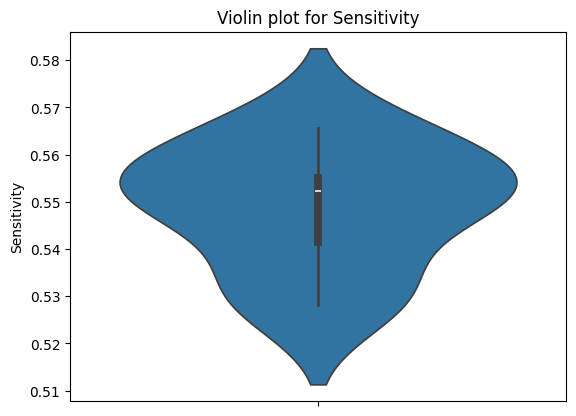

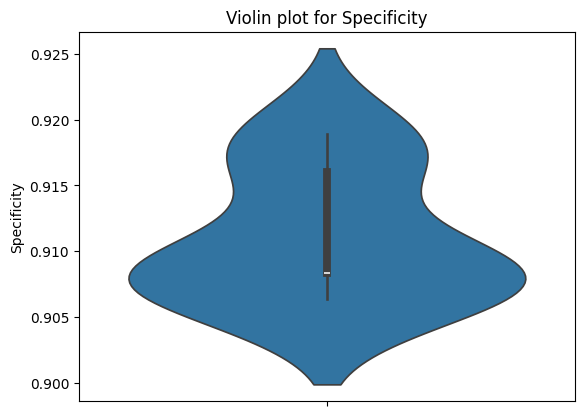

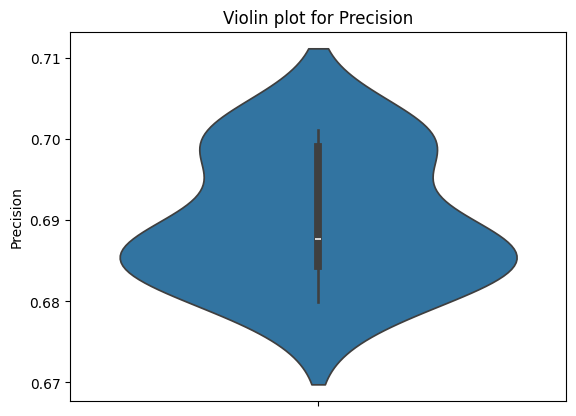

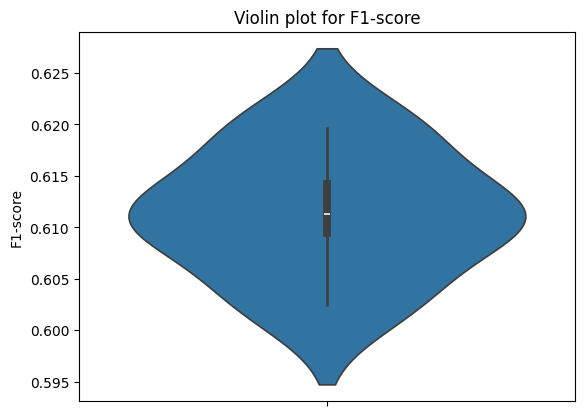

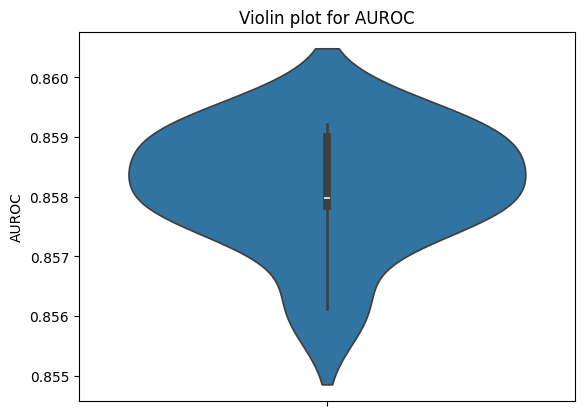

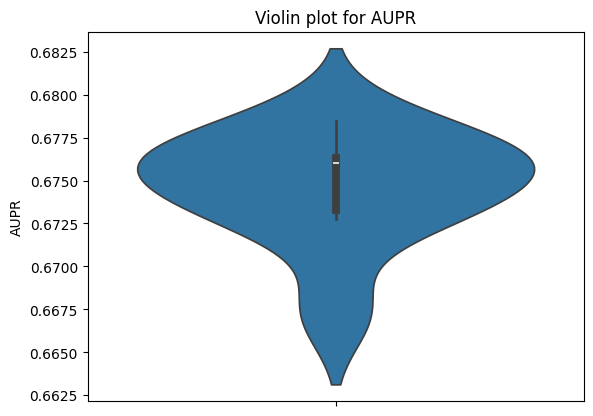

    LR (avg ± std) Voting Ensemble
0  0.5490 ± 0.0131          0.5442
1  0.9111 ± 0.0050          0.9131
2  0.6900 ± 0.0079          0.6928
3  0.6113 ± 0.0060          0.6096
4  0.8582 ± 0.0010          0.8591
5  0.6746 ± 0.0033          0.6765
For Credit Card Dataset:0.9948767992193218
{'Sensitivity': 0.8137254901960784, 'Specificity': 0.9994996247185389, 'Precision': 0.9764705882352941, 'F1-score': 0.8877005347593584, 'AUROC': 0.9867866586214169, 'AUPR': 0.891064058075461}


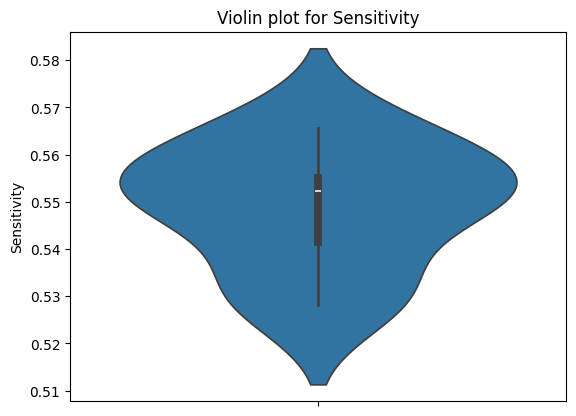

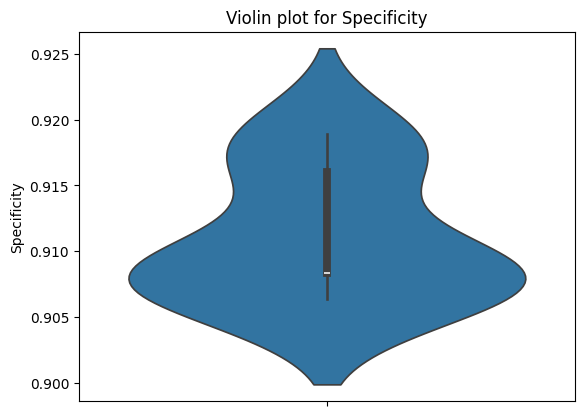

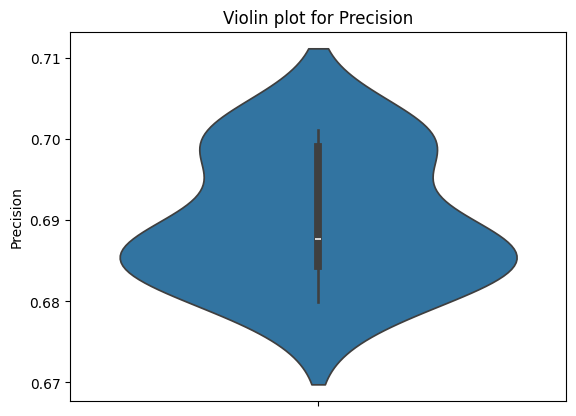

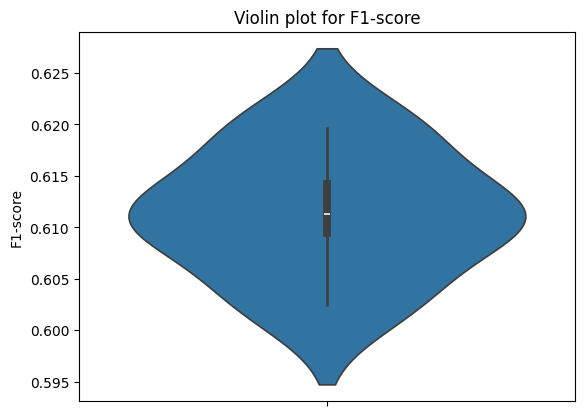

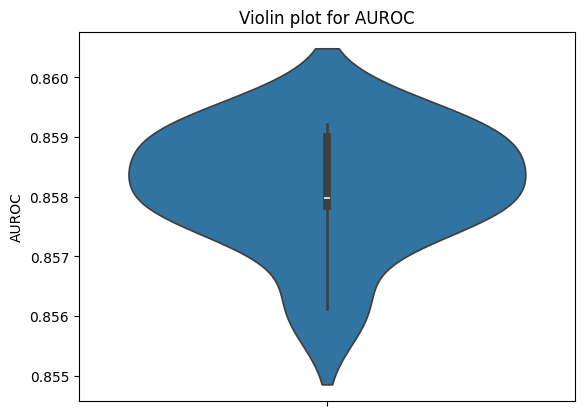

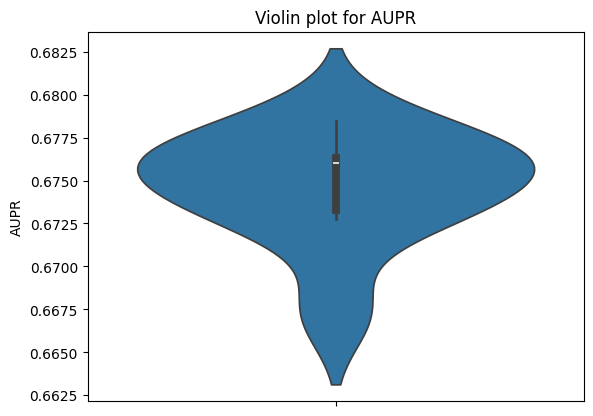

    LR (avg ± std) Voting Ensemble
0  0.5490 ± 0.0131          0.5442
1  0.9111 ± 0.0050          0.9131
2  0.6900 ± 0.0079          0.6928
3  0.6113 ± 0.0060          0.6096
4  0.8582 ± 0.0010          0.8591
5  0.6746 ± 0.0033          0.6765
For Adult Dataset:0.8427679394001433
{'Sensitivity': 0.5397027600849257, 'Specificity': 0.939034259509037, 'Precision': 0.7376668601276842, 'F1-score': 0.6233447768513978, 'AUROC': 0.8967190665276057, 'AUPR': 0.7434521762969422}


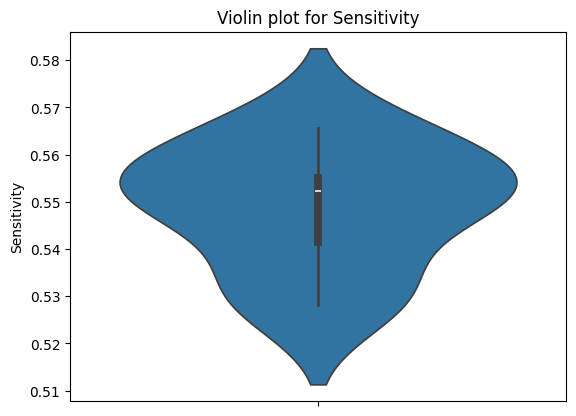

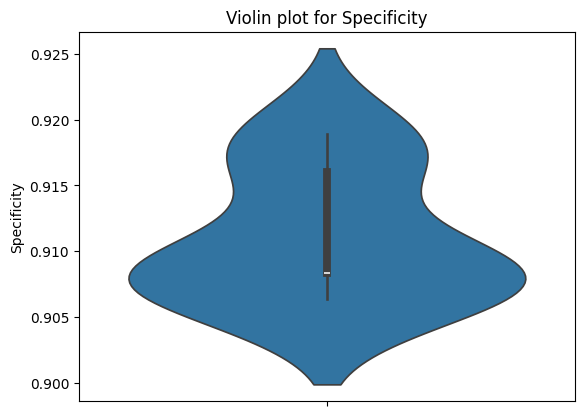

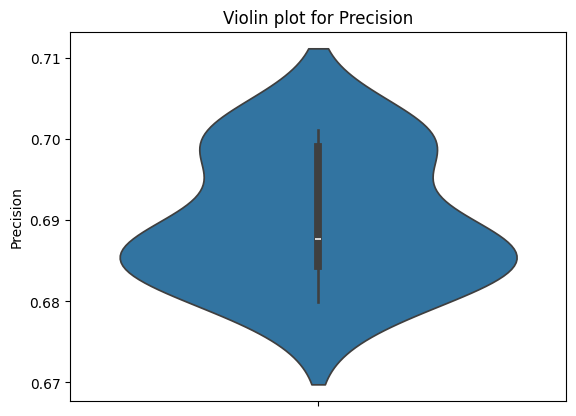

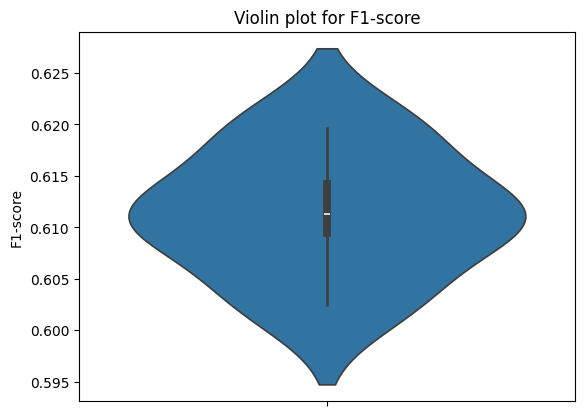

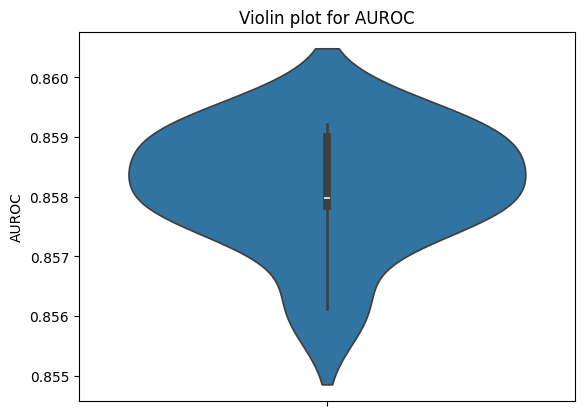

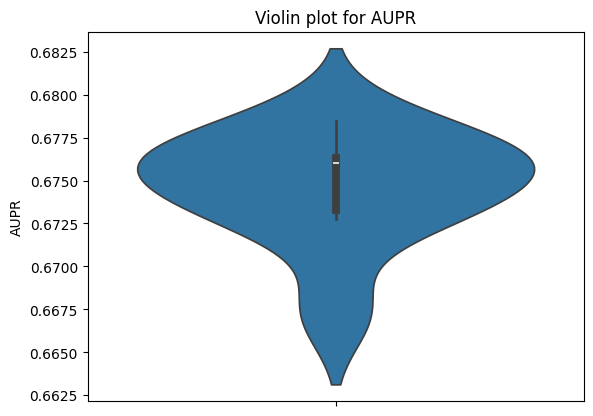

    LR (avg ± std) Voting Ensemble
0  0.5490 ± 0.0131          0.5442
1  0.9111 ± 0.0050          0.9131
2  0.6900 ± 0.0079          0.6928
3  0.6113 ± 0.0060          0.6096
4  0.8582 ± 0.0010          0.8591
5  0.6746 ± 0.0033          0.6765


In [ ]:
#voting ensemble
from sklearn.metrics import accuracy_score


bootstrap_samples = generate_bootstrap_samples(x_telco_train, y_telco_train, 9, 0.9)
base_models = train_base_models(bootstrap_samples)
predictions, probabilites = voting_ensemble_prediction(base_models, x_telco_test)
# accuracy = accuracy_score(y_telco_test, predictions)
# print(f'For Telco Dataset:{accuracy}')
# print(calculate_metrics(y_telco_test, predictions, probabilites))
lr_metrics_list, ensemble_metrics = evaluate_performance(x_telco_train, y_telco_train, x_telco_test, y_telco_test)
plot_violin_plots(lr_metrics_list)
comparison_table = comparative_analysis_table(lr_metrics_list, ensemble_metrics)
print(comparison_table)



bootstrap_samples = generate_bootstrap_samples(x_credit_card_train, y_credit_card_train, 9, 0.9)
base_models = train_base_models(bootstrap_samples)
predictions, probabilites = voting_ensemble_prediction(base_models, x_credit_card_test)
accuracy = accuracy_score(y_credit_card_test, predictions)
print(f'For Credit Card Dataset:{accuracy}')
print(calculate_metrics(y_credit_card_test, predictions, probabilites))
lr_metrics_list, ensemble_metrics = evaluate_performance(x_telco_train, y_telco_train, x_telco_test, y_telco_test)
plot_violin_plots(lr_metrics_list)
comparison_table = comparative_analysis_table(lr_metrics_list, ensemble_metrics)
print(comparison_table)



bootstrap_samples = generate_bootstrap_samples(x_adult_train, y_adult_train, 9, 0.9)
base_models = train_base_models(bootstrap_samples)
predictions,probabilites = voting_ensemble_prediction(base_models, x_adult_test)
accuracy = accuracy_score(y_adult_test, predictions)
print(f'For Adult Dataset:{accuracy}')
print(calculate_metrics(y_adult_test, predictions, probabilites))
lr_metrics_list, ensemble_metrics = evaluate_performance(x_telco_train, y_telco_train, x_telco_test, y_telco_test)
plot_violin_plots(lr_metrics_list)
comparison_table = comparative_analysis_table(lr_metrics_list, ensemble_metrics)
print(comparison_table)

In [ ]:
x_telco_train, x_telco_valid, y_telco_train, y_telco_valid = train_test_split(x_telco_train, y_telco_train, test_size=0.2, random_state=42)
x_credit_card_train, x_credit_card_valid, y_credit_card_train, y_credit_card_valid = train_test_split(x_credit_card_train, y_credit_card_train, test_size=0.2, random_state=42)
x_adult_train, x_adult_valid, y_adult_train, y_adult_valid = train_test_split(x_adult_train, y_adult_train, test_size=0.2, random_state=42)

In [ ]:
#stacking
def training_meta_model(base_models, x_valid, y_valid):
  meta_features = np.zeros((x_valid.shape[0], len(base_models)))
  for i, model in enumerate(base_models):
    meta_features[:,i] = model.predict(x_valid)

  meta_model = LogisticRegression()
  meta_model.fit(meta_features, y_valid)

  return meta_model

def stacking_ensemble_prediction(base_models, meta_model, x_test):
  meta_features = np.zeros((x_test.shape[0], len(base_models)))
  for i, model in enumerate(base_models):
    meta_features[:,i] = model.predict(x_test)

  final_prediction = meta_model.predict(meta_features)

  final_probabilities = meta_model.predict_proba(meta_features)
  return final_prediction, final_probabilities




In [ ]:
bootstrap_samples = generate_bootstrap_samples(x_telco_train, y_telco_train, 9, 0.3)
base_models = train_base_models(bootstrap_samples)
meta_model = training_meta_model(base_models, x_telco_valid, y_telco_valid)
predictions, proba = stacking_ensemble_prediction(base_models, meta_model, x_telco_test)
accuracy = accuracy_score(y_telco_test, predictions)
print(f'For Telco Dataset:{accuracy}')
print(calculate_metrics(y_telco_test, predictions, proba))


bootstrap_samples = generate_bootstrap_samples(x_credit_card_train, y_credit_card_train, 9, 0.9)
base_models = train_base_models(bootstrap_samples)
meta_model = training_meta_model(base_models, x_credit_card_valid, y_credit_card_valid)
predictions, proba = stacking_ensemble_prediction(base_models, meta_model, x_credit_card_test)
accuracy = accuracy_score(y_credit_card_test, predictions)
print(f'For Credit Card Dataset:{accuracy}')
print(calculate_metrics(y_credit_card_test, predictions, proba))


bootstrap_samples = generate_bootstrap_samples(x_adult_train, y_adult_train, 9, 0.3)
base_models = train_base_models(bootstrap_samples)
meta_model = training_meta_model(base_models, x_adult_valid, y_adult_valid)
predictions, proba  = stacking_ensemble_prediction(base_models, meta_model, x_adult_test)
accuracy = accuracy_score(y_adult_test, predictions)
print(f'For Adult Dataset:{accuracy}')
print(calculate_metrics(y_adult_test, predictions, proba))


In [ ]:
df_copy = telco_df.copy()
x, y = preprocess(df_copy, 'telco', 'MinMaxScaler')
x.head(20)
x['PhoneService'].head()
# print("uniques:")
# for col in x:
#   print(x[col].unique())

# print(x.shape)






# telco_df_copy.head()
